<a href="https://colab.research.google.com/github/TGJAISAI/Anakin_Assignment/blob/main/Anakin_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd 
import numpy as np 

In [158]:
df = pd.read_excel('/content/Analyst Assignment Dataset.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,AZ_url,AZ_Subcat,AZ_buy box price,AZ_MRP,AZ_Seller,AZ_Bank_Name1,AZ_instant_discount1,AZ_min_purchase_value1,AZ_max_limit1,AZ_Bank_Name2,AZ_instant_discount2,AZ_min_purchase_value2,AZ_max_limit2,AZ_Bank_Name3,AZ_instant_discount3,AZ_min_purchase_value3,AZ_max_limit3,AZ_EMI_total_bank,AZ_max_tenure,AZ_bank,FK_url,FK_Subcat,FK_buy box price,FK_MRP,FK_Seller,FK_Bank_Name1,FK_instant_discount1,FK_min_purchase_value1,FK_max_limit1,FK_Bank_Name2,FK_instant_discount2,FK_min_purchase_value2,FK_max_limit2,FK_Bank_Name3,FK_instant_discount3,FK_min_purchase_value3,FK_max_limit3,FK_EMI_total_bank,FK_max_tenure,FK_bank
0,https://www.amazon.in/dp/B0B5S2ZJ8H?th=1,Traditional Laptops,"3,96,990.","₹4,73,990",Appario Retail Private Ltd,HSBC Cashback Card Credit Card,0.05,1000.0,"100,00,000",HSBC Cashback Card Credit Card,0.05,1000.0,"100,00,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/asus-rog-zephyrus-duo...,Laptops,"₹3,96,990","₹4,73,990",TBL Online4.6Seller changed. Check for any cha...,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out,Sold Out
1,https://www.amazon.in/dp/B0BHZ7SVT4?th=1,Traditional Laptops,"3,29,990.","₹3,62,990",Appario Retail Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/asus-zenbook-17-fold-...,Laptops,"₹3,29,990","₹3,62,990",TBL Online4.6,Flipkart Axis Bank Card,NaN,0,"100,00,000",DBS Bank Credit Card,0.1,2000,750,NaN,NaN,NaN,NaN,19,12,"AU Bank Credit Card,American Express,Axis Bank..."
2,https://www.amazon.in/dp/B09JR8RKNN?th=1,NaN,"3,19,990.","₹3,29,900",Appario Retail Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/apple-2021-macbook-pr...,Laptops,"₹3,19,990","₹3,29,900",SuperComNet4.7,Flipkart Axis Bank Card,NaN,0,"100,00,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,24,HDFC Bank
3,https://www.amazon.in/dp/B09JQYWGVN?th=1,NaN,"3,19,990.","₹3,29,900",Appario Retail Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/apple-2021-macbook-pr...,Laptops,"₹3,29,900","₹3,29,900",TREASURE HAUL ONLINE5,Flipkart Axis Bank Card,NaN,0,"100,00,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,24,HDFC Bank
4,https://www.amazon.in/dp/B09WJB2BD2?th=1,Traditional Laptops,"3,04,990.","₹3,89,990",Appario Retail Private Ltd,HSBC Cashback Card Credit Card,0.05,1000.0,"100,00,000",HSBC Cashback Card Credit Card,0.05,1000.0,"100,00,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/asus-rog-zephyrus-m16...,Laptops,"₹3,04,990","₹3,95,990",TBL Online4.6,Flipkart Axis Bank Card,NaN,0,"100,00,000",DBS Bank Credit Card,0.1,2000,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df.shape

(198, 40)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AZ_url                  198 non-null    object 
 1   AZ_Subcat               165 non-null    object 
 2   AZ_buy box price        177 non-null    object 
 3   AZ_MRP                  177 non-null    object 
 4   AZ_Seller               166 non-null    object 
 5   AZ_Bank_Name1           124 non-null    object 
 6   AZ_instant_discount1    123 non-null    float64
 7   AZ_min_purchase_value1  123 non-null    float64
 8   AZ_max_limit1           124 non-null    object 
 9   AZ_Bank_Name2           124 non-null    object 
 10  AZ_instant_discount2    123 non-null    float64
 11  AZ_min_purchase_value2  123 non-null    float64
 12  AZ_max_limit2           124 non-null    object 
 13  AZ_Bank_Name3           22 non-null     object 
 14  AZ_instant_discount3    20 non-null     fl

**We can see that AZ_buy box price is an object data type we must convert into int.**

In [161]:
#change object sold out to int 0 
df.loc[df['FK_instant_discount1'] == "Sold Out", 'FK_instant_discount1'] = '0'
df.loc[df['FK_min_purchase_value1'] == "Sold Out", 'FK_min_purchase_value1'] = '0'
df.loc[df['FK_max_limit1'] == "Sold Out", 'FK_max_limit1'] = '0'
df.loc[df['FK_instant_discount2'] == "Sold Out", 'FK_instant_discount2'] = '0'
df.loc[df['FK_min_purchase_value2'] == "Sold Out", 'FK_min_purchase_value2'] = '0'
df.loc[df['FK_max_limit2'] == "Sold Out", 'FK_max_limit2'] = '0'
df.loc[df['FK_instant_discount3'] == "Sold Out", 'FK_instant_discount3'] = '0'
df.loc[df['FK_min_purchase_value3'] == "Sold Out", 'FK_min_purchase_value3'] = '0'
df.loc[df['FK_EMI_total_bank'] == "Sold Out", 'FK_EMI_total_bank'] = '0'


In [162]:
#converting object to numeric and removing  the ₹ 

df['AZ_buy box price'] = pd.to_numeric(df['AZ_buy box price'].str.replace(',', ''))
df['AZ_MRP'] = pd.to_numeric(df['AZ_MRP'].str.replace(',', '').str.replace('₹', '').astype(float))
df['AZ_max_limit1'] = pd.to_numeric(df['AZ_max_limit1'].str.replace(',', ''))
df['AZ_max_limit2'] = pd.to_numeric(df['AZ_max_limit2'].str.replace(',', ''))
df['AZ_max_limit3'] = pd.to_numeric(df['AZ_max_limit3'].str.replace(',', ''))
df['FK_buy box price'] = pd.to_numeric(df['FK_buy box price'].str.replace(',', '').str.replace('₹', '').astype(float))
df['FK_instant_discount1']= pd.to_numeric(df['FK_instant_discount1'].str.replace(',', ''))
df['FK_min_purchase_value1'] = pd.to_numeric(df['FK_min_purchase_value1'].str.replace(',', ''))
df['FK_max_limit1'] = pd.to_numeric(df['FK_max_limit1'].str.replace(',', ''))
df['FK_instant_discount2'] = pd.to_numeric(df['FK_instant_discount2'].str.replace(',', ''))
df['FK_min_purchase_value2'] = pd.to_numeric(df['FK_min_purchase_value2'].str.replace(',', ''))
df['FK_max_limit2'] = pd.to_numeric(df['FK_max_limit2'].str.replace(',', ''))
df['FK_instant_discount3'] = pd.to_numeric(df['FK_instant_discount3'].str.replace(',', ''))
df['FK_min_purchase_value3'] = pd.to_numeric(df['FK_min_purchase_value3'].str.replace(',', ''))
df['FK_EMI_total_bank'] = pd.to_numeric(df['FK_EMI_total_bank'].str.replace(',', ''))

In [163]:
df['AZ_buy box price'].unique()

array([396990., 329990., 319990., 304990., 259900.,     nan, 224990.,
       178700., 166990., 149900., 141490., 126990., 144009., 134990.,
       129617., 129990., 108490., 109990., 113990., 109829., 120500.,
       143900., 125999., 111999.])

In [164]:
#Perform range checks on columns such as price to ensure that the values fall within realistic ranges.
min_price = 0
max_price = 1000000

df['price_error'] = (df['AZ_buy box price'] < np.array(min_price))
df['price_error2'] =  (df['AZ_buy box price'] > max_price)
print(df[df['price_error'] == True])


Empty DataFrame
Columns: [AZ_url, AZ_Subcat, AZ_buy box price, AZ_MRP, AZ_Seller, AZ_Bank_Name1, AZ_instant_discount1, AZ_min_purchase_value1, AZ_max_limit1, AZ_Bank_Name2, AZ_instant_discount2, AZ_min_purchase_value2, AZ_max_limit2, AZ_Bank_Name3, AZ_instant_discount3, AZ_min_purchase_value3, AZ_max_limit3, AZ_EMI_total_bank, AZ_max_tenure, AZ_bank, FK_url, FK_Subcat, FK_buy box price, FK_MRP, FK_Seller, FK_Bank_Name1, FK_instant_discount1, FK_min_purchase_value1, FK_max_limit1, FK_Bank_Name2, FK_instant_discount2, FK_min_purchase_value2, FK_max_limit2, FK_Bank_Name3, FK_instant_discount3, FK_min_purchase_value3, FK_max_limit3, FK_EMI_total_bank, FK_max_tenure, FK_bank, price_error, price_error2]
Index: []


In [165]:
print(df[df['price_error2'] == True])

Empty DataFrame
Columns: [AZ_url, AZ_Subcat, AZ_buy box price, AZ_MRP, AZ_Seller, AZ_Bank_Name1, AZ_instant_discount1, AZ_min_purchase_value1, AZ_max_limit1, AZ_Bank_Name2, AZ_instant_discount2, AZ_min_purchase_value2, AZ_max_limit2, AZ_Bank_Name3, AZ_instant_discount3, AZ_min_purchase_value3, AZ_max_limit3, AZ_EMI_total_bank, AZ_max_tenure, AZ_bank, FK_url, FK_Subcat, FK_buy box price, FK_MRP, FK_Seller, FK_Bank_Name1, FK_instant_discount1, FK_min_purchase_value1, FK_max_limit1, FK_Bank_Name2, FK_instant_discount2, FK_min_purchase_value2, FK_max_limit2, FK_Bank_Name3, FK_instant_discount3, FK_min_purchase_value3, FK_max_limit3, FK_EMI_total_bank, FK_max_tenure, FK_bank, price_error, price_error2]
Index: []


In [166]:
df['AZ_Bank_Name1'].unique()
#we have to change HSBC Cashback Card Credit Card str to HSBC Cashback Credit Card

array(['HSBC Cashback Card Credit Card', nan, 'HDFC Credit Card',
       'ICICI Bank Credit Card'], dtype=object)

In [167]:
df.loc[df['AZ_Bank_Name1'] == 'HSBC Cashback Card Credit Card', 'AZ_Bank_Name1'] = 'HSBC Cashback Credit Card'
df['AZ_Bank_Name1'].unique()

array(['HSBC Cashback Credit Card', nan, 'HDFC Credit Card',
       'ICICI Bank Credit Card'], dtype=object)

In [168]:
#to get the idea how many null values  all the columns  has 
df.isnull().sum()

AZ_url                      0
AZ_Subcat                  33
AZ_buy box price          173
AZ_MRP                     39
AZ_Seller                  32
AZ_Bank_Name1              74
AZ_instant_discount1       75
AZ_min_purchase_value1     75
AZ_max_limit1              74
AZ_Bank_Name2              74
AZ_instant_discount2       75
AZ_min_purchase_value2     75
AZ_max_limit2              74
AZ_Bank_Name3             176
AZ_instant_discount3      178
AZ_min_purchase_value3    178
AZ_max_limit3             176
AZ_EMI_total_bank          39
AZ_max_tenure              39
AZ_bank                    39
FK_url                      0
FK_Subcat                   1
FK_buy box price            3
FK_MRP                      3
FK_Seller                   3
FK_Bank_Name1               5
FK_instant_discount1      164
FK_min_purchase_value1    164
FK_max_limit1               5
FK_Bank_Name2              16
FK_instant_discount2      164
FK_min_purchase_value2    164
FK_max_limit2             120
FK_Bank_Na

<Axes: >

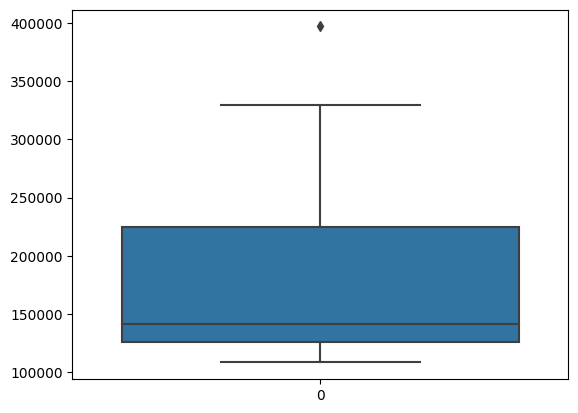

In [169]:
#Check for outliers or extreme values that are significantly higher or lower than the majority of values.
import seaborn as sns

sns.boxplot(df['AZ_buy box price'])


In [170]:
df.loc[df['AZ_Bank_Name2'] == 'HSBC Cashback Card Credit Card', 'AZ_Bank_Name2'] = 'HSBC Cashback Credit Card'
df['AZ_Bank_Name2'].unique()

array(['HSBC Cashback Credit Card', nan, 'HDFC Credit Card',
       'ICICI Bank Debit Card'], dtype=object)

In [171]:
df.loc[df['AZ_Bank_Name3'] == 'HSBC Cashback Card Credit Card', 'AZ_Bank_Name3'] = 'HSBC Cashback Credit Card'
df['AZ_Bank_Name3'].unique()

array([nan, 'HSBC Cashback Credit Card', 'ICICI Bank Credit Card'],
      dtype=object)

In [172]:
duplicates = df.duplicated(subset=['AZ_url'], keep=False)

# Find the duplicated rows
#there no duplicates  in the az_url

print(df[duplicates])

Empty DataFrame
Columns: [AZ_url, AZ_Subcat, AZ_buy box price, AZ_MRP, AZ_Seller, AZ_Bank_Name1, AZ_instant_discount1, AZ_min_purchase_value1, AZ_max_limit1, AZ_Bank_Name2, AZ_instant_discount2, AZ_min_purchase_value2, AZ_max_limit2, AZ_Bank_Name3, AZ_instant_discount3, AZ_min_purchase_value3, AZ_max_limit3, AZ_EMI_total_bank, AZ_max_tenure, AZ_bank, FK_url, FK_Subcat, FK_buy box price, FK_MRP, FK_Seller, FK_Bank_Name1, FK_instant_discount1, FK_min_purchase_value1, FK_max_limit1, FK_Bank_Name2, FK_instant_discount2, FK_min_purchase_value2, FK_max_limit2, FK_Bank_Name3, FK_instant_discount3, FK_min_purchase_value3, FK_max_limit3, FK_EMI_total_bank, FK_max_tenure, FK_bank, price_error, price_error2]
Index: []


In [173]:
duplicates = df.duplicated(subset=['FK_url'], keep=False)

# Find the duplicated rows
#there no duplicates  in the FK_url

print(df[duplicates])

Empty DataFrame
Columns: [AZ_url, AZ_Subcat, AZ_buy box price, AZ_MRP, AZ_Seller, AZ_Bank_Name1, AZ_instant_discount1, AZ_min_purchase_value1, AZ_max_limit1, AZ_Bank_Name2, AZ_instant_discount2, AZ_min_purchase_value2, AZ_max_limit2, AZ_Bank_Name3, AZ_instant_discount3, AZ_min_purchase_value3, AZ_max_limit3, AZ_EMI_total_bank, AZ_max_tenure, AZ_bank, FK_url, FK_Subcat, FK_buy box price, FK_MRP, FK_Seller, FK_Bank_Name1, FK_instant_discount1, FK_min_purchase_value1, FK_max_limit1, FK_Bank_Name2, FK_instant_discount2, FK_min_purchase_value2, FK_max_limit2, FK_Bank_Name3, FK_instant_discount3, FK_min_purchase_value3, FK_max_limit3, FK_EMI_total_bank, FK_max_tenure, FK_bank, price_error, price_error2]
Index: []


In [174]:
# display the rows where the URL format is incorrect

url_pattern = '^(https?://)?([a-zA-Z0-9-]+\.)+[a-zA-Z]{2,}(\/\S*)?$'
az_url_matches = df['AZ_url'].str.contains(url_pattern)
fk_url_matches = df['FK_url'].str.contains(url_pattern)
print(df[~az_url_matches])
print(df[~fk_url_matches])

Empty DataFrame
Columns: [AZ_url, AZ_Subcat, AZ_buy box price, AZ_MRP, AZ_Seller, AZ_Bank_Name1, AZ_instant_discount1, AZ_min_purchase_value1, AZ_max_limit1, AZ_Bank_Name2, AZ_instant_discount2, AZ_min_purchase_value2, AZ_max_limit2, AZ_Bank_Name3, AZ_instant_discount3, AZ_min_purchase_value3, AZ_max_limit3, AZ_EMI_total_bank, AZ_max_tenure, AZ_bank, FK_url, FK_Subcat, FK_buy box price, FK_MRP, FK_Seller, FK_Bank_Name1, FK_instant_discount1, FK_min_purchase_value1, FK_max_limit1, FK_Bank_Name2, FK_instant_discount2, FK_min_purchase_value2, FK_max_limit2, FK_Bank_Name3, FK_instant_discount3, FK_min_purchase_value3, FK_max_limit3, FK_EMI_total_bank, FK_max_tenure, FK_bank, price_error, price_error2]
Index: []
Empty DataFrame
Columns: [AZ_url, AZ_Subcat, AZ_buy box price, AZ_MRP, AZ_Seller, AZ_Bank_Name1, AZ_instant_discount1, AZ_min_purchase_value1, AZ_max_limit1, AZ_Bank_Name2, AZ_instant_discount2, AZ_min_purchase_value2, AZ_max_limit2, AZ_Bank_Name3, AZ_instant_discount3, AZ_min_purch

<ipython-input-174-b5f5fa1d1678>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  az_url_matches = df['AZ_url'].str.contains(url_pattern)
<ipython-input-174-b5f5fa1d1678>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fk_url_matches = df['FK_url'].str.contains(url_pattern)


In [175]:
#A bit erroneous free data_set
df.head()

,AZ_url,AZ_Subcat,AZ_buy box price,AZ_MRP,AZ_Seller,AZ_Bank_Name1,AZ_instant_discount1,AZ_min_purchase_value1,AZ_max_limit1,AZ_Bank_Name2,AZ_instant_discount2,AZ_min_purchase_value2,AZ_max_limit2,AZ_Bank_Name3,AZ_instant_discount3,AZ_min_purchase_value3,AZ_max_limit3,AZ_EMI_total_bank,AZ_max_tenure,AZ_bank,FK_url,FK_Subcat,FK_buy box price,FK_MRP,FK_Seller,FK_Bank_Name1,FK_instant_discount1,FK_min_purchase_value1,FK_max_limit1,FK_Bank_Name2,FK_instant_discount2,FK_min_purchase_value2,FK_max_limit2,FK_Bank_Name3,FK_instant_discount3,FK_min_purchase_value3,FK_max_limit3,FK_EMI_total_bank,FK_max_tenure,FK_bank,price_error,price_error2
0,https://www.amazon.in/dp/B0B5S2ZJ8H?th=1,Traditional Laptops,396990.0,473990.0,Appario Retail Private Ltd,HSBC Cashback Credit Card,0.05,1000.0,10000000.0,HSBC Cashback Credit Card,0.05,1000.0,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/asus-rog-zephyrus-duo...,Laptops,396990.0,"₹4,73,990",TBL Online4.6Seller changed. Check for any cha...,Sold Out,0.0,0.0,0.0,Sold Out,0.0,0.0,0.0,Sold Out,0.0,0.0,Sold Out,0.0,Sold Out,Sold Out,False,False
1,https://www.amazon.in/dp/B0BHZ7SVT4?th=1,Traditional Laptops,329990.0,362990.0,Appario Retail Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/asus-zenbook-17-fold-...,Laptops,329990.0,"₹3,62,990",TBL Online4.6,Flipkart Axis Bank Card,NaN,NaN,10000000.0,DBS Bank Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,"AU Bank Credit Card,American Express,Axis Bank...",False,False
2,https://www.amazon.in/dp/B09JR8RKNN?th=1,NaN,319990.0,329900.0,Appario Retail Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/apple-2021-macbook-pr...,Laptops,319990.0,"₹3,29,900",SuperComNet4.7,Flipkart Axis Bank Card,NaN,NaN,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,HDFC Bank,False,False
3,https://www.amazon.in/dp/B09JQYWGVN?th=1,NaN,319990.0,329900.0,Appario Retail Private Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/apple-2021-macbook-pr...,Laptops,329900.0,"₹3,29,900",TREASURE HAUL ONLINE5,Flipkart Axis Bank Card,NaN,NaN,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,HDFC Bank,False,False
4,https://www.amazon.in/dp/B09WJB2BD2?th=1,Traditional Laptops,304990.0,389990.0,Appario Retail Private Ltd,HSBC Cashback Credit Card,0.05,1000.0,10000000.0,HSBC Cashback Credit Card,0.05,1000.0,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.flipkart.com/asus-rog-zephyrus-m16...,Laptops,304990.0,"₹3,95,990",TBL Online4.6,Flipkart Axis Bank Card,NaN,NaN,10000000.0,DBS Bank Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
